## Maximum Likelihood Estimation

Machine learning is the desired tool especially in the real-world problems where there are factors of uncertainty and randomness. Having learned the principled way of accounting for uncertainty via probability theory, next we will see how we can use this theory build machine learning models. Every machine learning problem has two key components: the data and the model. Let our data set  be $S=\{x_1, x_2, \ldots, x_m\}$, where $x_i$ are the observed data points. At the stage of modeling, we draw a hypothesis about how this data could have been generated. Let our hypothesis be that the data is generated as independent samples a distribution following a parametric density function $p(x|\theta)$, where $\theta$ is the parameter of the distribution. Then the probability density function of the random variable $S$ representing the occurrence of the data set is given by

$$p(S|\theta) = p(x_1, x_2, \ldots, x_m | \theta) = \prod_{i=1}^m p(x_i|\theta).$$

This density function is called the **likelihood** of parameters $\theta$ given the data set $S$. The second equality follows from the assumption that the data points are independent. The maximum likelihood estimation (MLE) is a method of estimating the parameters $\theta$ by maximizing the likelihood function $p(S|\theta)$. This way we aim to find the parameters that are most likely to have generated the data set $S$. We are up to solving the optimization problem below:

$$\theta_{MLE} = \arg\max_\theta p(S|\theta) = \arg\max_\theta \prod_{i=1}^m p(x_i|\theta).$$

Consider that formulating the loss function as a product of terms is prone to creating numerical problems. For example, if the likelihood function is very small, then the product of many such terms will be even smaller, and the floating point system may not be able to represent it. Furthermore, if we are to calculate gradient descent to fit $\theta$, we will have to calculate the gradient of the product of terms, which is much more difficult than calculating the gradient of sums. Therefore, we will take the logarithm of the likelihood function and maximize it instead. Since the logarithm is a monotonically increasing function, the maximum of the likelihood function and the log-likelihood function will be reached at the same $\theta$ value. Using the logarithm of the likelihood function, called the **log-likelihood** function, we arrive at the following optimization problem:

$$\theta_{MLE} = \arg\max_\theta \sum_{i=1}^m \log p(x_i|\theta).$$

Let us give an example. Choose $p(x|\theta) = \mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$, where $\theta = (\mu, \sigma^2)$. Then consider that a single term of the log-likelihood function for a data point $x_i$ is given by

$$\log p(x_i|\theta) = -\frac{1}{2}\log(2\pi\sigma^2) - \frac{(x_i-\mu)^2}{2\sigma^2}.$$

We can then maximize the likelihood with respect to $\mu$ and $\sigma^2$ by setting the gradient of the full likelihood function to zero and solving for $\mu$:

$$\frac{\partial}{\partial \mu} \sum_{i=1}^m \log p(x_i|\theta) = \sum_{i=1}^m \frac{x_i-\mu}{\sigma^2} = 0 \implies \mu_{MLE} = \frac{1}{m}\sum_{i=1}^m x_i.$$

We can also solve for $\sigma^2$:

$$\frac{\partial}{\partial \sigma^2} \sum_{i=1}^m \log p(x_i|\theta) = -\frac{m}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^m (x_i-\mu)^2 = 0 \implies \sigma^2_{MLE} = \frac{1}{m}\sum_{i=1}^m (x_i-\mu)^2.$$

This is an interesting outcome. The maximum likelihood estimate of the parameters of a normal distribution is the sample mean and the sample variance.

Let us next do a more difficult example. Consider the supervised learning problem of fitting to **probabilistic** linear model to the data set $S = \{(x_1, y_1), (x_2, y_2), \ldots, (x_m, y_m)\}$. Let us choose the model to be $y|x \sim \mathcal{N}(y|w^T \phi(x), \sigma^2)$, where $\phi(x)$ is a feature vector of $x$. For instance in the polynomial curve fitting example, it was $\phi(x) = (1, x, x^2, \ldots, x^d)$. Then the log-likelihood function is given by:

\begin{align*}
\log p(S|w, \sigma^2) &= \sum_{i=1}^m \log \mathcal{N}(y_i|w^T \phi(x_i), \sigma^2) \\
&= \sum_{i=1}^m \log \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y_i-w^T \phi(x_i))^2}{2\sigma^2}\right) \\
&= -\frac{m}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^m (y_i-w^T \phi(x_i))^2.
\end{align*}

Let us set the gradient of the log-likelihood function to zero and solve for $w$:

\begin{align*}
&\frac{\partial}{\partial w} \sum_{i=1}^m \log \mathcal{N}(y_i|w^T \phi(x_i), \sigma^2) = \frac{1}{\sigma^2}\sum_{i=1}^m (y_i-w^T \phi(x_i))\phi(x_i) = 0 \\
&\implies w_{MLE} = \left(\sum_{i=1}^m \phi(x_i) \phi(x_i)^T\right)^{-1}\sum_{i=1}^m \phi(x_i) y_i.
\end{align*}


This the least-squares solution we already know! In the probabilistic modeling framework, we also get the variance from the data, which was not available in the vanilla least-squares solution. Let us next set $w := w_{MLE}$ and learn $\sigma^2_{MLE}$ in the same way:

\begin{align*}
&\frac{\partial}{\partial \sigma^2} \sum_{i=1}^m \log \mathcal{N}(y_i|w^T_{MLE} \phi(x_i), \sigma^2) = -\frac{m}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^m (y_i-w_{MLE}^T \phi(x_i))^2 = 0 \\
&\implies \sigma^2_{MLE} = \frac{1}{m}\sum_{i=1}^m (y_i-w_{MLE}^T\phi(x_i))^2.
\end{align*}

The process of fitting $w$ and $\sigma^2$ to the data corresponds to the **learning** stage of a maximum likelihood estimation based approach.

Given a test input $x_*$, the learned model predicts the output in the form of a distribution, which is called the **predictive distribution**: 

$y_*|x \sim \mathcal{N}(y_*|w_{MLE}^T \phi(x_*), \sigma^2_{MLE}).$ 

This is a much richer representation than a single prediction least-squares provided earlier! The predictive distribution can be used in different ways depending on the purpose. For instance, if we want to predict the most likely output, we can use the mean of the predictive distribution as the prediction, that is $\widehat{y} := w^T_{MLE} \phi(x_*)$. If we have a safety-critical prediction task, we can also build confidence sets. For instance,

\begin{align*}
P\left(|y_* - w_{MLE}^T \phi(x_*)| \leq \sigma_{MLE}\right) &= P\left(w_{MLE}^T \phi(x_*) - \sigma_{MLE} \leq y_* \leq w_{MLE}^T \phi(x_*) + \sigma_{MLE}\right) \\
&= \int_{w_{MLE}^T \phi(x_*) - \sigma_{MLE}}^{w_{MLE}^T \phi(x_*) + \sigma_{MLE}} \mathcal{N}(y_*|w_{MLE}^T \phi(x_*), \sigma^2_{MLE}) dy_* \\
&= \int_{w_{MLE}^T \phi(x_*) - \sigma_{MLE}}^{w_{MLE}^T \phi(x_*) + \sigma_{MLE}} \frac{1}{\sqrt{2\pi\sigma^2_{MLE}}}\exp\left(-\frac{(y_*-w_{MLE}^T \phi(x_*))^2}{2\sigma^2_{MLE}}\right) dy_* \\
&= \int_{-1}^{1} \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{z^2}{2}\right) dz = 0.68.
\end{align*}

## Bayesian Learning

The MLE approach cannot model the potential dependency of the variance on the input $x$. It also does not take into account model misspecification. That is, it assumes that the modeler is certain about the fact that $y$ is linearly dependent on $x$. The only source of uncertainty is on the precise values of the model parameters, which can be mitigated by collecting more data due to the law of large numbers. This ansatz is called **frequentist learning**. However, in real-world problems, the modeler is never certain about the model and in many cases she is interested in accounting for this source of uncertainty. **Bayesian learning** offers a way to do this. Let us see how it works on the same linear regression problem. This time our modeling assumption, sometimes referred to as the **generative process** or the **data generating process**, is as follows:

\begin{align*}
 w &\sim \mathcal{N}(w|0, \alpha^{-1}I) \\
 y_i|x_i, w &\sim \mathcal{N}(y_i|w^T \phi(x_i), \sigma^2), \quad i=1,\ldots,m.
\end{align*}

This time we are not assuming that $w$ is a fixed parameter, but a random variable. We start with the prior belief that $w \sim p(w)$. Based on the data, we update our belief about $w$ to $p(w|S)$. As introduced earlier, $p(w)$ is called the **prior distribution** and $p(w|S)$ is called the **posterior distribution**. The goal of **learning** in  Bayesian machine learning is to calculate the posterior distribution $p(w|S)$ given the data set $S$. This is done via the Bayes' rule:

$$p(w|S) = \frac{p(S|w)p(w)}{p(S)} = \frac{p(S|w)p(w)}{\int p(S|w)p(w) dw}.$$

The term in the denominator $p(S) = \int p(S|w)p(w) dw$ is called the **evidence**. There are two pieces of crucial information about its role in machine learning:

 - In almost every real-world use case, the evidence is intractable to calculate. Therefore, we will not be able to calculate the posterior distribution exactly. Instead, we will use approximations. The whole field of Bayesian machine learning is about finding good approximations to the posterior distribution.

 - The evidence quantifies the fit of the whole model family to data, as it can be viewed as the average likelihood with respect to the prior distribution. Therefore, it can be used for model selection. For instance, if we have two competing models $p(S,w)$ and $p'(S,w')$, we can choose the one with the higher evidence.

 Let us next calculate the posterior distribution for the linear regression problem. We have:

\begin{align*}
p(w|S) &=  \prod_{i=1}^m \mathcal{N}(y_i|w^T \phi(x_i), \sigma^2) \mathcal{N}(w|0, \alpha^{-1}I) \\
   & = \mathcal{N}(w|0, \alpha^{-1}I) \prod_{i=1}^m \mathcal{N}(y_i|w^T \phi(x_i), \sigma^2) \\
    & \propto \exp\left(-\frac{1}{2}w^T \alpha I w\right) \prod_{i=1}^m \exp\left(-\frac{1}{2\sigma^2}(y_i-w^T \phi(x_i))^2\right) \\
    & \propto \exp\left(-\frac{1}{2}w^T \alpha I w - \frac{1}{2\sigma^2}\sum_{i=1}^m (y_i-w^T \phi(x_i))^2\right) \\
    & \propto \exp\left(-\frac{1}{2}w^T \left(\alpha I + \frac{1}{\sigma^2}\sum_{i=1}^m \phi(x_i) \phi(x_i)^T\right) w + \frac{1}{\sigma^2}\sum_{i=1}^m y_i \phi(x_i)^T w\right)  \\
    & = \mathcal{N}\left(w\left|\left(\alpha I + \frac{1}{\sigma^2}\sum_{i=1}^m \phi(x_i) \phi(x_i)^T\right)^{-1}\frac{1}{\sigma^2}\sum_{i=1}^m y_i \phi(x_i), \left(\alpha I + \frac{1}{\sigma^2}\sum_{i=1}^m \phi(x_i) \phi(x_i)^T\right)^{-1}\right.\right).
\end{align*}

A neater notation would be possible considering that the posterior mean calculation involves the inverse of the posterior covariance.

$$p(w | S ) = \mathcal{N}(w|\mu_{post}, \Sigma_{post}),$$

where

\begin{align*}
\Sigma_{post} &= \left(\alpha I + \frac{1}{\sigma^2}\sum_{i=1}^m \phi(x_i) \phi(x_i)^T\right)^{-1}\\
\mu_{post} &= \Sigma_{post}\left ( \frac{1}{\sigma^2}\sum_{i=1}^m y_i \phi(x_i) \right ).
\end{align*}

For a new test input $x_*$, the Bayesian model predicts the output in the form of a distribution:

\begin{align*}
p(y_*|S, x_*) &= \int p(y_*|x_*, w) p(w|S) dw \\
&= \int \mathcal{N}(y_*|w^T \phi(x_*), \sigma^2) \mathcal{N}(w|\mu_{post}, \Sigma_{post}) dw \\
&= \mathcal{N}(y_*|\mu_{post}^T \phi(x_*), \sigma^2 + \phi(x_*)^T \Sigma_{post} \phi(x_*)).
\end{align*}

The resulting distribution $p(y_* | S, x_*)$ is called the **posterior predictive distribution**. This distribution has some remarkable properties:

 - It considers all possible values of $w$ and averages over them proportionally to their posterior probability. This essential and unique property of Bayesian models is called **model averaging**. It is a way of accounting for model uncertainty.

 - Its variance depends on the input $x_*$. Hence, it is able to take into account potential changes in the model confidence in different regions of the input space. This property of a probabilistic model is called **heteroscedasticity**. The Bayesian approach provides this property for free, whereas the frequentist approach requires a separate model for the variance.


In the cases where the predictor is a distribution, there are multiple ways one can use it to make a final prediction. For instance, one can choose the mode of the predictive distribution:

$$\widehat{y} = \arg\max_y p(y_* = y|S, x_*).$$

This is called the **Bayes predictor**. One can alternatively choose to take a sample from the predictive distribution:

$$\widehat{y} \sim p(y_*|S, x_*).$$

This is called the **Gibbs predictor**. Bayes predictor is known to be the optimal predictor in terms of the expected loss.

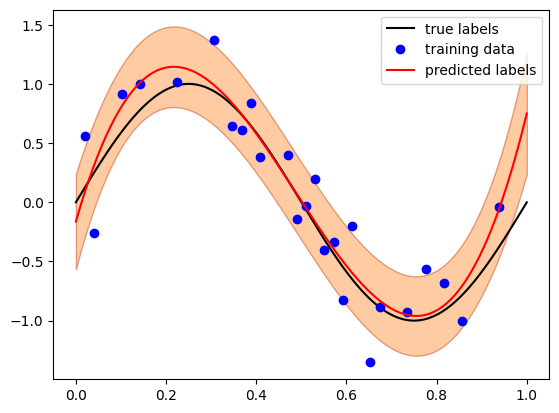

In [11]:
## Example polynomial curve fitting

import matplotlib.pyplot as plt
import numpy as np
import torch as th
import torch.nn as nn

# Generate data
inputs = np.linspace(0, 1, 50)              
outputs = np.sin(2*np.pi*inputs)                  
labels = outputs + np.random.randn(inputs.shape[0])*0.25

num_samples = inputs.shape[0]
num_train_samples = num_samples // 2 
# draw a random permutation of indices
idx = np.random.permutation(num_samples) 
inputs_train = inputs[idx[:num_train_samples]]
labels_train = labels[idx[:num_train_samples]]
inputs_test = inputs[idx[num_train_samples:]]
labels_test = labels[idx[num_train_samples:]]

class BayesianPolyReg:
    # last parameter was the "regularizer" in the non-Bayesian case
    def __init__(self, num_polynomial_degrees = 1, 
                prior_var=0, noise_var=0.1):
        self.M = num_polynomial_degrees
        self.prior_var = prior_var # alpha in the formulas
        self.noise_var = noise_var # sigma^2 in the formulas
      
    def extract_features(self, inputs):
        input_features = np.zeros([inputs.shape[0], self.M+1])

        for m in range(self.M+1):
            input_features[:,m] = inputs ** m 

        return input_features

    def learn(self, inputs, labels):

        # Do posterior inference    
        prediction = np.zeros_like(labels)

        input_features = self.extract_features(inputs)

        self.Sigma_posterior = \
        np.linalg.inv(self.prior_var * np.eye(self.M+1) \
        + 1/self.noise_var * input_features.T.dot(input_features))
        
        self.mu_posterior = \
        1/self.noise_var * self.Sigma_posterior.dot(input_features.T.dot(labels))
        
    def predict(self, inputs):

        input_features = self.extract_features(inputs)
        mu_prediction =  input_features.dot(self.mu_posterior)
        var_prediction = np.sum(input_features.dot(self.Sigma_posterior) \
                        * input_features, axis=1) + self.noise_var
        return mu_prediction, var_prediction

# Create the model instance
model = BayesianPolyReg(num_polynomial_degrees=3) 

# Training
model.learn(inputs_train, labels_train) 

# Plot on the whole domain
inputs = np.linspace(0, 1, 500)              
outputs = np.sin(2*np.pi*inputs) 
mu_p, var_p = model.predict(inputs)

plt.plot(inputs, outputs, 'k', label="true labels")
plt.plot(inputs_train, labels_train, 'bo', label="training data")
plt.plot(inputs, mu_p, 'r', label="predicted labels")
plt.fill_between(inputs, mu_p-np.sqrt(var_p), mu_p+np.sqrt(var_p),
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.legend(loc="upper right")


## Maximum A-Posteriori Estimation

In most real-world applications, the posterior distribution is intractable to calculate because of the integral in the denominator of the Bayes' rule. Therefore, we need to approximate it. One way to do this is to use the **maximum a-posteriori (MAP)** estimate. The MAP estimate is the mode of the posterior distribution:

$$w_{MAP} = \arg\max_w p(w|S) = \arg\max_w p(S|w)p(w) = \arg \max_w \log p(S|w) + \log p(w).$$

The intractable denominator $p(S)$ drops from the calculation since it does not depend on $w$. Hence the training objective becomes tractable.

For a given test input $x_*$, the MAP estimate predicts the output as follows:

$$y_* | x_* \sim p(y_*|w_{MAP},x_*).$$

The MAP estimate is a point estimate, which means that it does not take into account the uncertainty in the model parameters. It is not viewed as a truly Bayesian approach since it cannot perform model averaging.

## Monte Carlo Integration

Consider an integral of the form:

$$I = \int f(x) p(x) dx.$$

for some function $f(x)$ and probability density function $p(x)$. If we can take $m$ samples from $p(x)$, we can approximate the integral by the sample average:

$$I \approx \frac{1}{m}\sum_{i=1}^m f(x_i),$$

where $x_i \sim p(x)$. This is called the **Monte Carlo integration**. 

## Generative Models

For a supervised learning problem where the data comes from $x,y \sim D$ for an unknown data distribution $D$. We can approach the modeling problem in two ways based on what we want to approximate about the data distribution. Consider that the joint distribution factorizes in two ways:

 - $p(x,y) = p(y|x)p(x)$
 - $p(x,y) = p(x|y)p(y)$

 We can choose the first factorization and account for $p(x)$ using Monte Carlo integration based on the training samples. Then it suffices to approximate $p(y|x)$. This approach is called **discriminative modeling**. The probabilistic and Bayesian linear regressors we developed above were all discriminative models since they fitted $p(y|w,x)$ to data.

 An alternative approach would be to choose the second factorization: $p(x,y) = p(x|y)p(y)$ and aim to approximate both $p(y)$ and $p(x|y)$.  Notice that this approach attempts to infer the whole data generating process, where a label is first created and the related input is generated. A real-world example could be a person choosing the digit to draw first and then drawing it. The picture of the resulting drawing because the input of the aimed classifier. This approach is called **generative modeling**.

For instance, we can fit a generative model on a data set $S = \{(x_1, y_1), (x_2, y_2), \ldots, (x_m, y_m)\}$ by choosing a parametric distribution family $p(x|y,\theta)$. For a classification problem, we can approximate $p(y)$ by class frequencies, i.e.

 $P(y=c) = \frac{1}{m}\sum_{i=1}^m \mathbb{1}(y_i = c)$.

 and choose the class-conditional distribution to be:

 $$p(x|y=c, \theta_c) =  p(x|\theta_{c}),$$

 that is, each class shares the same distribution family but has its own parameters. Then we can fit the parameters $\theta_c$ on the training samples belonging to class $c$ by maximum likelihood estimation:

$$\theta_c^{MLE} = \arg\max_{\theta_c} \sum_{ \{i : y_i = c\} } \log p(x_i|\theta_c).$$

Given a test input $x_*$, the generative model predicts the output in the form of a distribution:

$$p(y=c|x_*) = \frac{p(x_*|y=c, \theta_c)P(y=c)}{\sum_{c'} p(x_*|y=c', \theta_{c'})P(y=c')}.$$

### Naive Bayes Classifier

In the generative classification example above, consider the case that the class-conditionals are normal distributions with full covariance matrices:

$$p(x|y=c, \theta_c) = \mathcal{N}(x|\mu_c, \Sigma_c).$$

Then the training set will be used to fit $d+d(d+1)/2$ parameters per class, where $d$ is the dimensionality of the input. The first term is due to the parameters of the mean and the rest is due to the parameters of the covariance matrix. This is a lot of parameters to fit. We can instead make the simplifying assumption that the class-conditionals of the individual features are independent. Then we have:

\begin{align*}
p(x|y=c, \theta_c) &= \prod_{j=1}^d p(x_j|\theta_{j,c}) \\
    &= \prod_{j=1}^d \mathcal{N}(x_j|\mu_{j,c}, \sigma_{j,c}^2).
\end{align*}

The assumption that the class-conditionals factorize across individual features is called the **naive Bayes assumption**. For the normal distributed class-conditionals used in our example, the resulting model will then have only $2d$ parameters per class. The resulting generative classifier is called a **naive Bayes classifier**. Applied to normal distributed class-conditionals, the naive Bayes classifier follows the same formulas as above with the assumption that the covariance matrix is diagonal.